# White River Watershed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


In [2]:
from apexmf_pst_pkgs import apexmf_pst_viz

In [3]:
wd = "D:/Projects/Watersheds/White/Analysis/APEX-MODFLOWs/calibration/white_apexmf_110420/APEX-MODFLOW"
os.chdir(wd)




In [4]:
obd_df = apexmf_pst_viz.obds_df('streamflow_month.obd', 'modflow.obd')
obd_df

sub_66  sub_46  sub_102  sub_130  sub_133  g591  g592   g593  \
date                                                                       
1990-01-31    9.27    0.13     7.32     0.02     7.64   NaN   NaN    NaN   
1990-02-28   13.29    0.14     7.19     0.02     7.48   NaN   NaN    NaN   
1990-03-31   14.04    0.12     8.87     0.02     7.93   NaN   NaN    NaN   
1990-04-30   13.01    0.11    11.18     0.02    10.61   NaN   NaN    NaN   
1990-05-31   14.54    0.11    16.42     0.01    12.98   NaN   NaN    NaN   
...            ...     ...      ...      ...      ...   ...   ...    ...   
2020-10-29     NaN     NaN      NaN      NaN      NaN   NaN   NaN -18.04   
2020-10-30     NaN     NaN      NaN      NaN      NaN   NaN   NaN -18.03   
2020-10-31     NaN     NaN      NaN      NaN      NaN   NaN   NaN -18.04   
2020-11-01     NaN     NaN      NaN      NaN      NaN   NaN   NaN -18.07   
2020-11-02     NaN     NaN      NaN      NaN      NaN   NaN   NaN -18.05   

            g491  g492  
date                    
1990-01-31   NaN   NaN  
1990-02-28   NaN   NaN  
1990-03-31   NaN   NaN  
1990-04-30   NaN   NaN  
1990-05-31   NaN   NaN  
...          ...   ...  
2020-10-29   NaN   NaN  
2020-10-30   NaN   NaN  
2020-10-31   NaN   NaN  
2020-11-01   NaN   NaN  
2020-11-02   NaN   NaN  

[4032 rows x 10 columns]

In [9]:
obd_str = obd_df[['sub_66', 'sub_102', 'sub_133']]
obd_wt = obd_df.iloc[:, 5:]

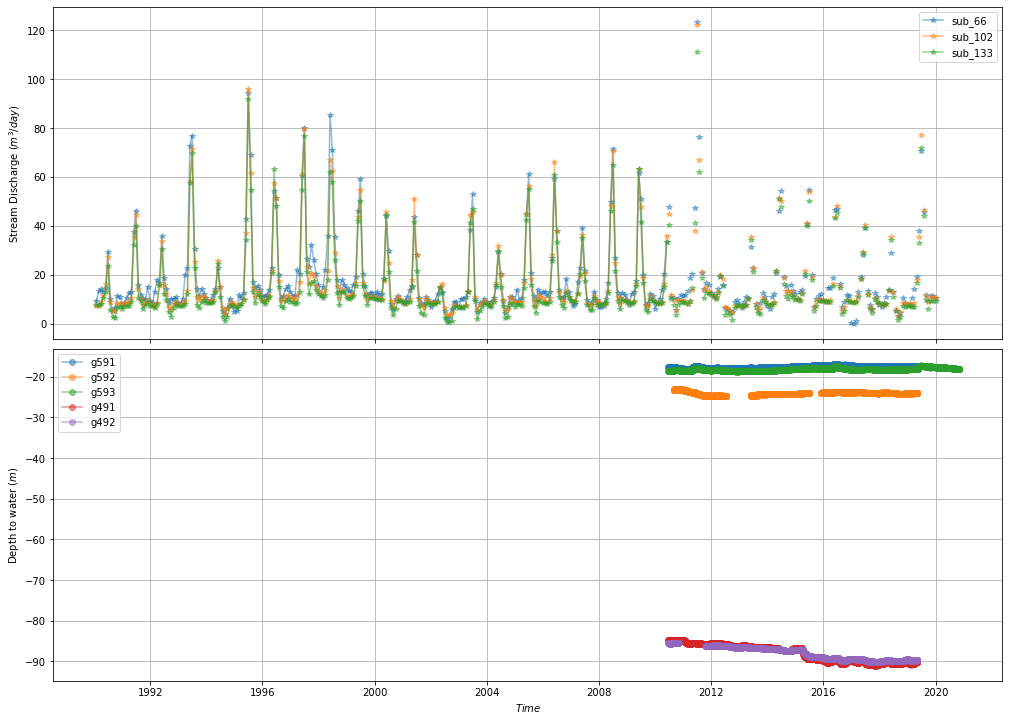

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axes[0].plot(obd_df.index, obd_str, '-*', alpha=0.5)
axes[1].plot(obd_df.index, obd_wt, '-o', alpha=0.5)
axes[0].set_ylabel("Stream Discharge $(m^3/day)$",fontsize=10)
axes[1].set_ylabel("Depth to water $(m)$",fontsize=10)
axes[1].set_xlabel("$Time$",fontsize=10)



axes[0].legend(obd_str.columns.tolist(), fontsize=10)
axes[1].legend(obd_wt.columns.tolist(), fontsize=10)
for ax in axes:
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=10)
fig.tight_layout()
plt.show()

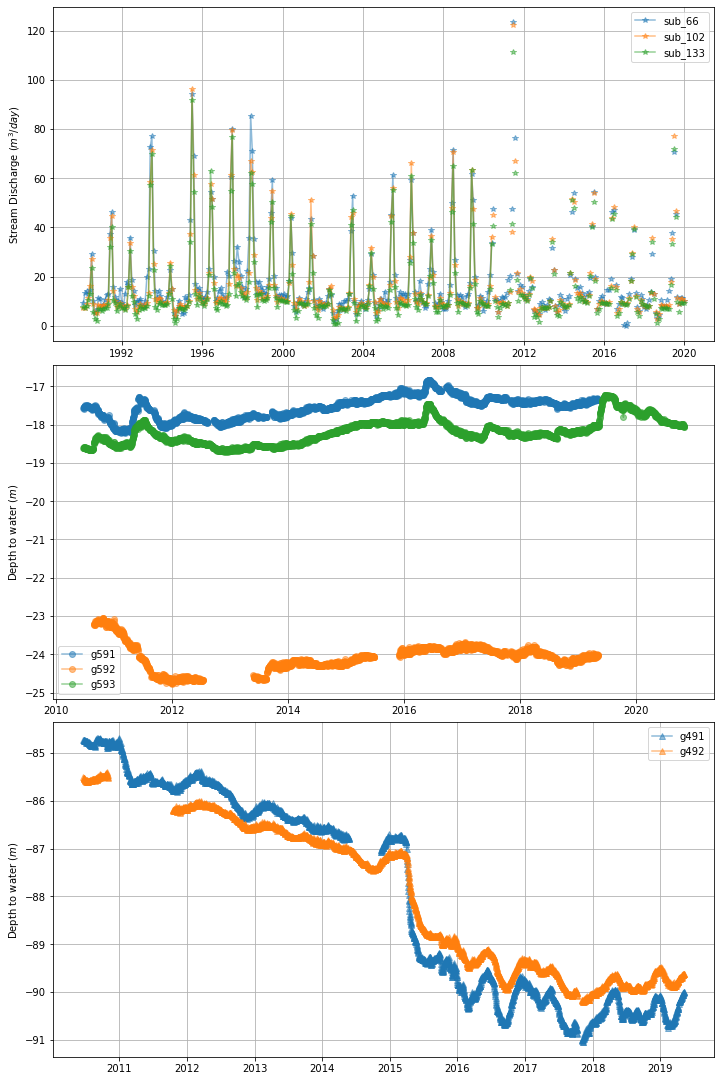

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15),)
axes[0].plot(obd_df.index, obd_str, '-*', alpha=0.5)
axes[1].plot(obd_df.index, obd_wt[['g591', 'g592', 'g593']], '-o', alpha=0.5)
axes[2].plot(obd_df.index, obd_wt[['g491', 'g492']], '-^', alpha=0.5)
axes[0].set_ylabel("Stream Discharge $(m^3/day)$",fontsize=10)
axes[1].set_ylabel("Depth to water $(m)$",fontsize=10)
axes[2].set_ylabel("Depth to water $(m)$",fontsize=10)
# axes[1].set_xlabel("$Time$",fontsize=10)



axes[0].legend(obd_str.columns.tolist(), fontsize=10)
axes[1].legend(obd_wt[['g591', 'g592', 'g593']].columns.tolist(), fontsize=10)
axes[2].legend(obd_wt[['g491', 'g492']].columns.tolist(), fontsize=10)
for ax in axes:
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=10)
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='date'>

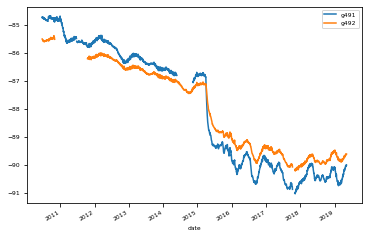

In [11]:
obd_df[['g491', 'g492']].plot()